# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [2]:
# ===== Twoja implementacja tutaj =====
f1 = lambda x: np.sign(x) * x + x**2

f2 = lambda x: np.sign(x) * x**2

f3 = lambda x: abs(np.sin(5*x))**3

f4_1 = lambda x: 1 / (1 + x**2)

f4_25 = lambda x: 1 / (1 + 25 * x**2)

f4_100 = lambda x: 1 / (1 + 100 * x**2)

f5 = lambda x: np.sign(x)

Zadanie polega na zaimplementowaniu kilku funkcji matematycznych, które będą wykorzystywane później w laboratorium. Należy przygotować funkcje o różnych własnościach: jedną ciągłą, ale nieróżniczkowalną, kolejne różniczkowalne odpowiednio jeden i trzy razy, a także trzy funkcje o postaci analitycznej zależnej od parametru oraz funkcję nieciągłą opartą na znaku liczby.

---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


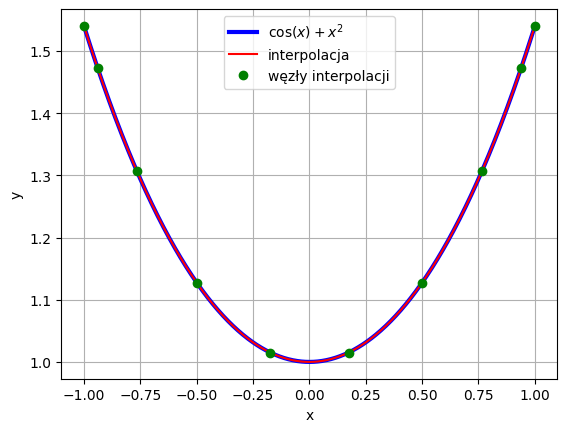

In [4]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.asarray(np.cos(x) + x**2)

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = np.array(main.chebyshev_nodes(n))

# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

Liczba węzłów: 10
Norma scipy: 0.11011227778498292
Norma barycentric: 0.1101122777849828
Czas scipy: 0.2436291000340134 s
Czas barycentric: 0.0001300000585615635 s


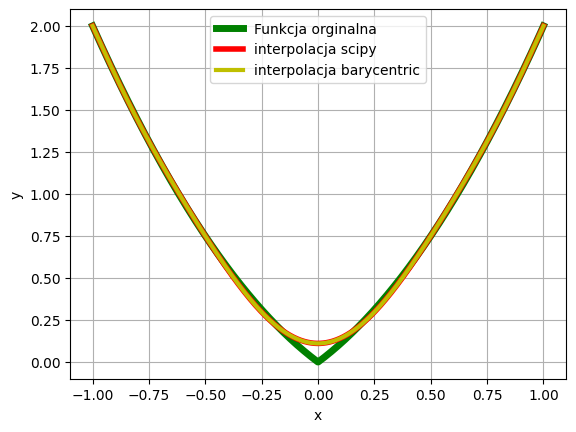

Liczba węzłów: 100
Norma scipy: 0.009124053856609018
Norma barycentric: 0.00912405385660904
Czas scipy: 0.0013113999739289284 s
Czas barycentric: 0.0006222999654710293 s


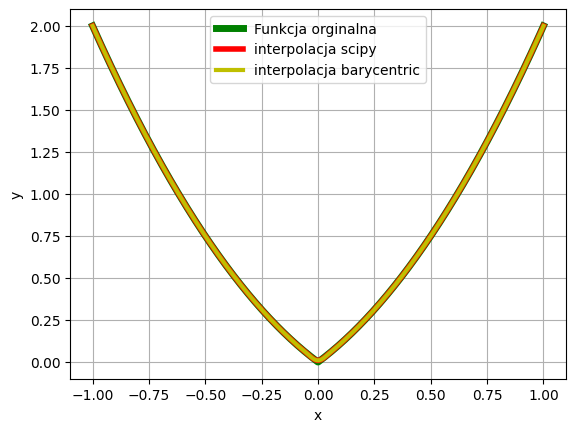

Liczba węzłów: 1000
Norma scipy: 0.0002380828388547421
Norma barycentric: 0.00023808283885475923
Czas scipy: 0.013849700102582574 s
Czas barycentric: 0.012018699897453189 s


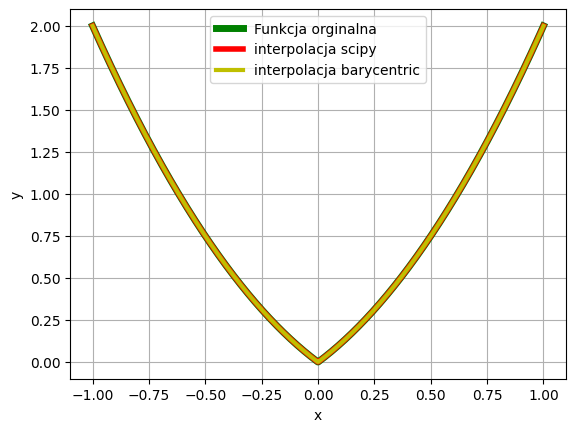

Liczba węzłów: 10000
Norma scipy: 1.8533453682045321e-06
Norma barycentric: 1.8533453686750759e-06
Czas scipy: 0.3081994999665767 s
Czas barycentric: 0.08968019997701049 s


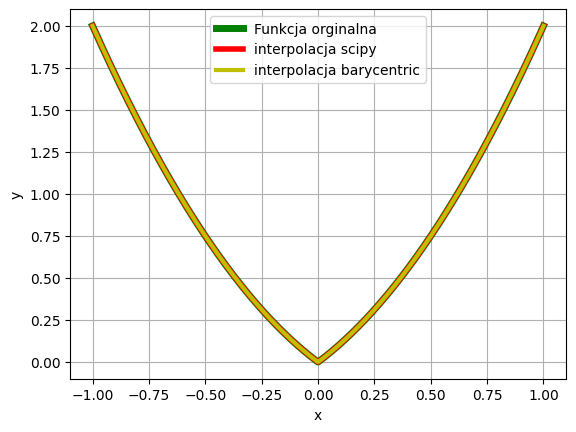

Liczba węzłów: 100000
Norma scipy: 2.2337218244777163e-09
Norma barycentric: 2.233718320336295e-09
Czas scipy: 25.30032469984144 s
Czas barycentric: 1.1119218999519944 s


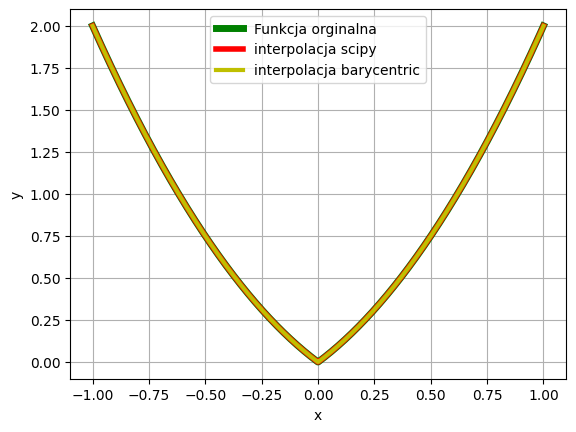

In [16]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-1, 1, 1000)


n = [10, 100, 1000, 10000, 100000]  
for i in n:
    print(f"Liczba węzłów: {i}")
    xch = np.array(main.chebyshev_nodes(i))
    start_time = time.perf_counter()
    yimp = sp.interpolate.barycentric_interpolate(xch, f1(xch), x)
    end_time = time.perf_counter()
    norma_s = main.L_inf(f1(x), yimp)
    res_s = end_time - start_time

    wi = main.bar_cheb_weights(i)
    start_time_ = time.perf_counter()
    y = main.barycentric_inte(xch, f1(xch), wi, x)
    end_time_ = time.perf_counter()
    norma = main.L_inf(f1(x), y)
    res = end_time_ - start_time_
    print(f"Norma scipy: {norma_s}")
    print(f"Norma barycentric: {norma}")

    print(f"Czas scipy: {res_s} s")
    print(f"Czas barycentric: {res} s")

    plt.plot(x, f1(x), 'g', linewidth = 5, label='Funkcja orginalna')
    plt.plot(x, yimp, 'r', linewidth = 4, label='interpolacja scipy')
    plt.plot(x, y, 'y', linewidth = 3, label='interpolacja barycentric')
    plt.plot()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc=0)
    plt.grid()
    plt.show()

W ramach zadania przeprowadzono interpolację metodą barycentryczną dla funkcji ciągłej nieróżniczkowalnej w węzłach Czebyszewa dla rzędów interpolacji wynoszących odpowiednio 10, 100, 1000, 10000 oraz 100000. Celem eksperymentu było zbadanie zachowania błędu aproksymacji mierzonego normą maksimum oraz czasu wykonywania obliczeń w zależności od liczby węzłów. Analiza wyników wskazuje, że wraz ze wzrostem rzędu interpolacji wartość normy błędu systematycznie maleje, co potwierdza zbieżność metody nawet dla funkcji posiadającej punkt nieróżniczkowalności. Ze względu na obecność ostrza w wykresie funkcji w punkcie zero, spadek błędu nie jest tak gwałtowny jak w przypadku funkcji klasy C-nieskończoność, jednak zastosowanie węzłów Czebyszewa skutecznie eliminuje efekt Rungego i pozwala na uzyskanie wiernego przybliżenia przy dużej liczbie węzłów. W kwestii wydajności czasowej zaobserwowano, że czas obliczeń rośnie wraz ze wzrostem liczby węzłów, co jest zgodne z liniową złożonością obliczeniową drugiego wzoru barycentrycznego względem liczby węzłów interpolacji. Porównanie czasów wykonania dla implementacji bibliotecznej oraz własnej wskazuje na zbliżoną efektywność obu rozwiązań, przy czym dla najwyższych rzędów czas ten staje się zauważalny. Ostatecznie wyniki potwierdzają, że interpolacja barycentryczna w węzłach Czebyszewa jest numerycznie stabilną metodą aproksymacji funkcji nieróżniczkowalnych, pozwalającą na osiągnięcie dowolnie małego błędu kosztem zwiększenia nakładu obliczeniowego.

---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

Funkcja 2:


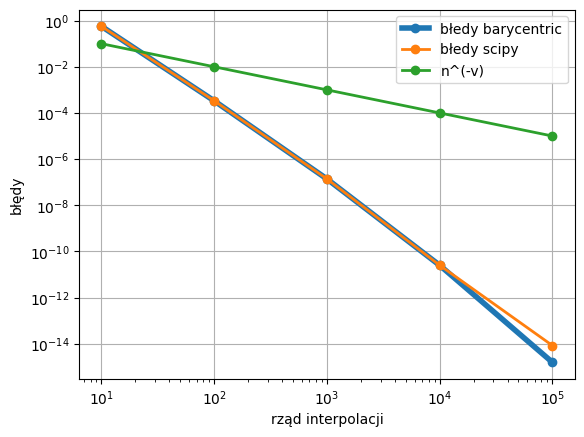

Funkcja 3:


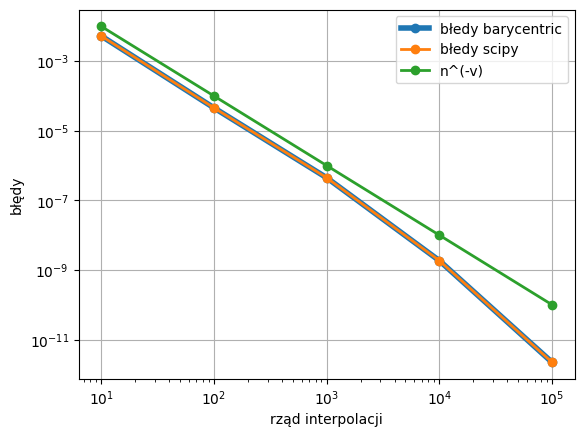

In [ ]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-0.9999, 0.9999, 1000)

n = [10, 100, 1000, 10000, 100000]  

bledy2 = []
bledy_s2 = []
bledy3 = []
bledy_s3 = []

theoretical_curve2 = np.array(n).astype(float)**(-1)
theoretical_curve3 = np.array(n).astype(float)**(-2)

for i in n:
    xch = np.array(main.chebyshev_nodes(i))
    yimp2 = sp.interpolate.barycentric_interpolate(xch, f3(xch), x)
    norma_s2 = (main.L_inf(f3(x), yimp2))
    bledy_s2.append(norma_s2)


    wi2 = main.bar_cheb_weights(i)
    y2 = main.barycentric_inte(xch, f3(xch), wi2, x)
    norma2 = (main.L_inf(f3(x), y2))
    bledy2.append(norma2)

    yimp3 = sp.interpolate.barycentric_interpolate(xch, f2(xch), x)
    norma_s3 = (main.L_inf(f2(x), yimp3))
    bledy_s3.append(norma_s3)

    wi3 = main.bar_cheb_weights(i)
    y3 = main.barycentric_inte(xch, f2(xch), wi3, x)
    norma3 = (main.L_inf(f2(x), y3))
    bledy3.append(norma3)

    if norma_s3 < 1e-15 and norma_s2 < 1e-15 and norma2 < 1e-15 and norma3 < 1e-15:
        break

print("Funkcja 2:")
plt.loglog(n, bledy2, "-o", linewidth = 4, label="błedy barycentric")
plt.loglog(n, bledy_s2, "-o", linewidth = 2, label="błedy scipy")
plt.loglog(n, theoretical_curve2, "-o", linewidth = 2, label="n^(-v)")
plt.xlabel("rząd interpolacji")
plt.ylabel("błędy")
plt.legend()
plt.grid()
plt.show()

print("Funkcja 3:")
plt.loglog(n, bledy3, "-o", linewidth = 4, label="błedy barycentric")
plt.loglog(n, bledy_s3, "-o", linewidth = 2, label="błedy scipy")
plt.loglog(n, theoretical_curve3, "-o", linewidth = 2, label="n^(-v)")
plt.xlabel("rząd interpolacji")
plt.ylabel("błędy")
plt.legend()
plt.grid()
plt.show()

Przeprowadzono analizę błędu interpolacji dla funkcji różniczkowalnej jednokrotnie (f2) oraz trzykrotnie (f3) w zależności od rzędu interpolacji n, wykorzystując węzły Czebyszewa. Wyniki przedstawione na wykresach w skali podwójnie logarytmicznej wykazują, że dla obu funkcji błąd interpolacji maleje wraz ze wzrostem liczby węzłów, jednak tempo tej zbieżności jest różne i zależne od klasy gładkości funkcji. Dla funkcji f3, która posiada wyższą pochodną (trzecią), krzywa błędu opada znacznie szybciej niż dla funkcji f2 (różniczkowalnej tylko raz), co potwierdza teoretyczną zależność, że im gładsza funkcja, tym szybsza zbieżność interpolacji wielomianowej. Charakterystyki spadku błędu są zbliżone do teoretycznych prostych  n^(-v) (gdzie v to rząd gładkości), co na wykresie logarytmicznym objawia się jako liniowa zależność o różnym nachyleniu. Dla najwyższych rzędów interpolacji (n=10^4, n=10^5) błąd osiąga poziom zera maszynowego (ok. 10e-15), po czym przestaje maleć, co wynika z ograniczonej precyzji arytmetyki zmiennoprzecinkowej, a nie z właściwości samej metody. Badanie potwierdza, że interpolacja w węzłach Czebyszewa jest metodą stabilną, a jej rząd zbieżności jest ściśle skorelowany z gładkością interpolowanej funkcji.

---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

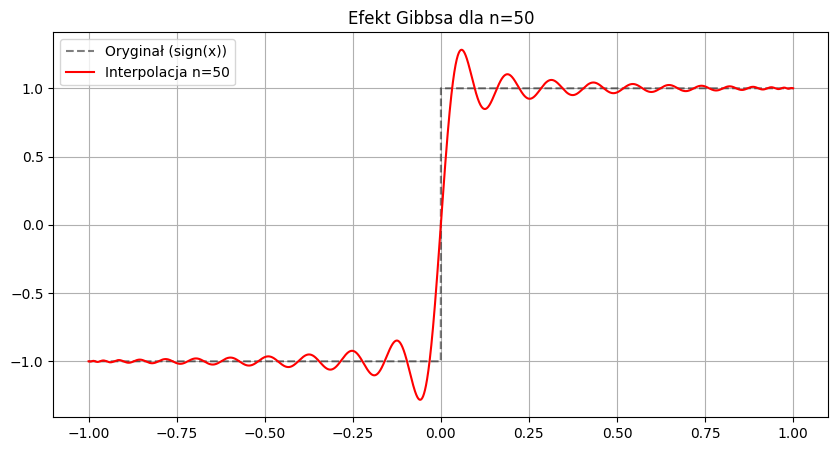

Średni błąd dla n parzystych: 0.9718
Średni błąd dla n nieparzystych: 1.9831


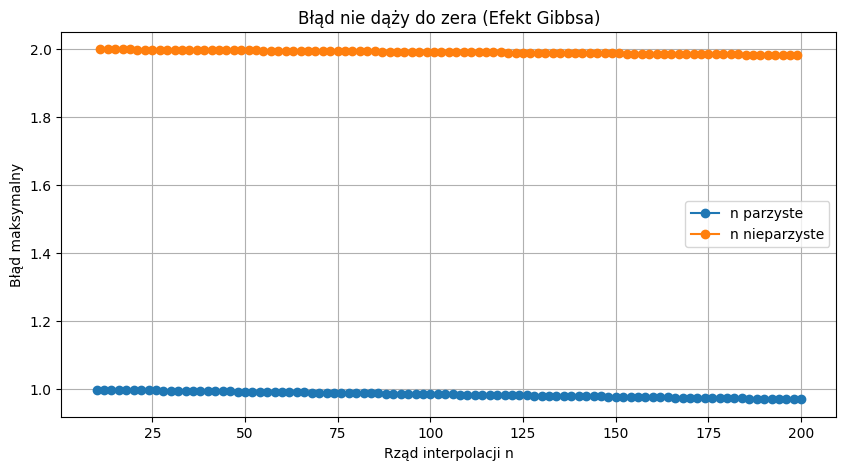

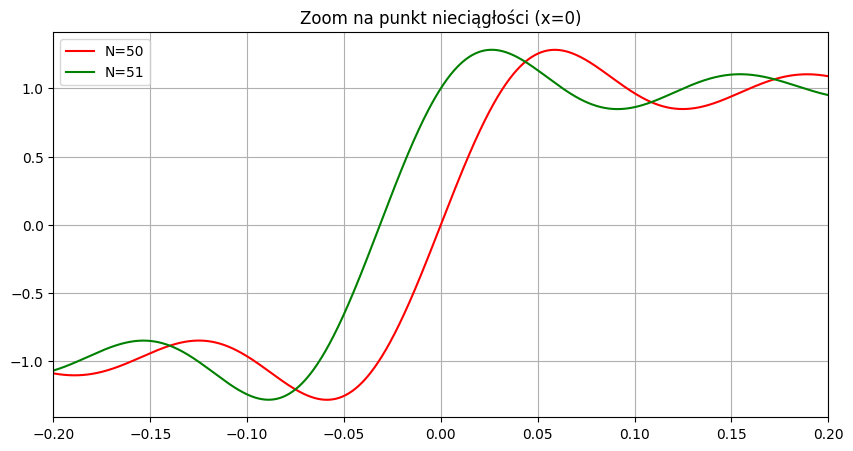

In [ ]:
# ===== Twoja implementacja tutaj =====
x = np.array(np.linspace(-1, 1, 5000)) 
y = f5(x)

n = 50
nodes_viz = np.array(main.chebyshev_nodes(n)) 
y_1 = np.array(f5(nodes_viz))
weights = main.bar_cheb_weights(n)
y_poly_viz = main.barycentric_inte(nodes_viz, y_1, weights, x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'k--', label='Oryginał (sign(x))', alpha=0.5)
plt.plot(x, y_poly_viz, 'r-', label=f'Interpolacja n={n}')
plt.title(f'Efekt Gibbsa dla n={n}')
plt.legend()
plt.grid(True)
plt.show()


ns = range(10, 201) 
errors_odd = []
errors_even = []

for n in ns:
    nodes = np.array(main.chebyshev_nodes(n)) 
    weight = np.array(main.bar_cheb_weights(n))
    y_poly = np.array(main.barycentric_inte(nodes, f5(nodes), weight, x))
    max_err = np.array(main.L_inf(y, y_poly))
    
    if n % 2 == 0:
        errors_even.append(max_err)
    else:
        errors_odd.append(max_err)

print(f"Średni błąd dla n parzystych: {np.mean(errors_even[-10:]):.4f}")
print(f"Średni błąd dla n nieparzystych: {np.mean(errors_odd[-10:]):.4f}")

plt.figure(figsize=(10, 5))
plt.plot(ns[::2], errors_even, 'o-', label='n parzyste') 
plt.plot(ns[1::2], errors_odd, 'o-', label='n nieparzyste')
plt.xlabel('Rząd interpolacji n')
plt.ylabel('Błąd maksymalny')
plt.title('Błąd nie dąży do zera (Efekt Gibbsa)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
for n, color in [(50, 'r'), (51, 'g')]:
    nodes = np.array(main.chebyshev_nodes(n))
    weights = np.array(main.bar_cheb_weights(n))
    y = main.barycentric_inte(nodes, f5(nodes), weights, x)
    plt.plot(x, y, color=color, label=f'N={n}')

plt.xlim(-0.2, 0.2)
plt.title("Zoom na punkt nieciągłości (x=0)")
plt.legend()
plt.grid(True)
plt.show()

W ramach zadania przeanalizowano efekt Gibbsa dla nieciągłej funkcji signum interpolowanej w węzłach Czebyszewa. Wykresy potwierdzają, że błąd interpolacji nie dąży do zera wraz ze wzrostem rzędu wielomianu, lecz stabilizuje się, tworząc charakterystyczne oscylacje w pobliżu punktu nieciągłości. Szczegółowa analiza wykazała interesującą różnicę między parzystymi i nieparzystymi rzędami interpolacji. Dla rzędów parzystych (np. n=50), ze względu na symetrię rozmieszczenia węzłów i wartości funkcji, wielomian interpolacyjny staje się funkcją nieparzystą i przechodzi idealnie przez punkt (0,0). Mimo tego poprawnego zachowania w punkcie nieciągłości, to właśnie dla rzędów parzystych obserwuje się silniejsze oscylacje (większy overshoot) i wyższy błąd maksymalny. W przypadku rzędów nieparzystych (np. n=51), ze względu na numeryczne aspekty wyznaczania węzła środkowego, wielomian w okolicy zera przyjmuje wartość bliską 1 (lub -1), nie przechodząc przez zero. Mimo to, amplituda oscylacji dla rzędów nieparzystych jest mniejsza, co skutkuje niższym błędem globalnym w porównaniu do rzędów parzystych. Ostatecznie potwierdzono, że niezależnie od parzystości rzędu, zjawisko Gibbsa uniemożliwia jednostajną zbieżność interpolacji dla funkcji nieciągłych.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)